In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_paths = tf.io.matching_files('./dataset/mnist_png/training/*/*.png')

In [3]:
path = data_paths[0]
path

<tf.Tensor: id=5, shape=(), dtype=string, numpy=b'./dataset/mnist_png/training/0/1.png'>

## Load Image

In [4]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

## Set Data Generator

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
inputs = image[tf.newaxis, ...]

In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

0.0 252.71361 39.661015


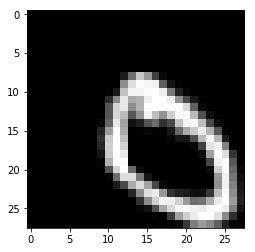

In [8]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

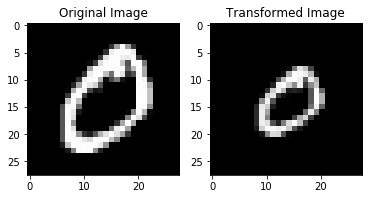

In [9]:
datagen = ImageDataGenerator(
    zoom_range=0.7
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

In [10]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255.
)